# TSP Environment - test import

In [14]:
%matplotlib inline

In [15]:
from torchrl.envs.utils import check_env_specs

import sys; sys.path.append(2*'../')
from ncobench.envs import TSPEnv

### Testing the environment

In [16]:
env = TSPEnv(n_loc=5)
check_env_specs(env)

check_env_specs succeeded!


### Rollout

In [22]:
# Reset the environment: call new one to enable new seeding after check_env_specs
env = TSPEnv(n_loc=5)
env.set_seed(888)

rollout = env.rollout(
    50,
    auto_reset=False,  # we're executing the reset out of the ``rollout`` call
    tensordict=env.reset(env.gen_params(batch_size=[128])),
    break_when_any_done=True
)

print(rollout)

TensorDict(
    fields={
        action: Tensor(shape=torch.Size([128, 5, 1]), device=cpu, dtype=torch.int64, is_shared=False),
        cur_coord: Tensor(shape=torch.Size([128, 5, 1, 2]), device=cpu, dtype=torch.float32, is_shared=False),
        dist: Tensor(shape=torch.Size([128, 5, 5, 5]), device=cpu, dtype=torch.float32, is_shared=False),
        done: Tensor(shape=torch.Size([128, 5, 1]), device=cpu, dtype=torch.bool, is_shared=False),
        first_a: Tensor(shape=torch.Size([128, 5, 1]), device=cpu, dtype=torch.int64, is_shared=False),
        i: Tensor(shape=torch.Size([128, 5, 1]), device=cpu, dtype=torch.int64, is_shared=False),
        ids: Tensor(shape=torch.Size([128, 5, 1]), device=cpu, dtype=torch.int64, is_shared=False),
        lengths: Tensor(shape=torch.Size([128, 5, 1]), device=cpu, dtype=torch.float32, is_shared=False),
        loc: Tensor(shape=torch.Size([128, 5, 5, 2]), device=cpu, dtype=torch.float32, is_shared=False),
        next: TensorDict(
            fiel

### Plotting

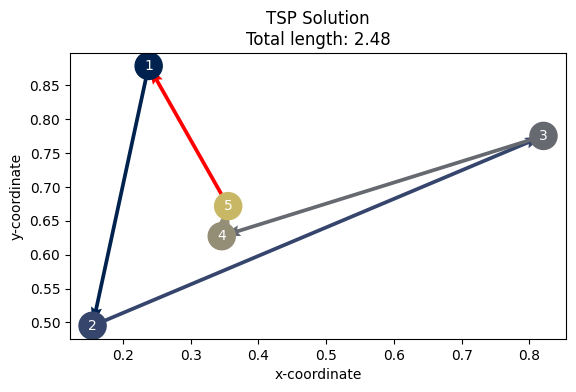

In [23]:
# get greater than -inf reward indexes
last_state = rollout['next'][:, -1]
idx = last_state["reward"] > -float('inf')
rollout_finished = last_state[idx.squeeze()]

env.plot(rollout_finished)